In [1]:
import math

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from tensorflow.keras import layers

In [2]:
# Set CPU as available physical device
tf.config.experimental.set_visible_devices(devices=[], device_type="GPU")

In [3]:
creditcard = pd.read_csv("../data/creditcard.csv.gz")
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
scaler_cc = MinMaxScaler()

creditcard_scaled = scaler_cc.fit_transform(creditcard)
creditcard_scaled

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        3.12696634e-01, 5.82379309e-03, 0.00000000e+00],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        3.13422663e-01, 1.04705276e-04, 0.00000000e+00],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        3.11911316e-01, 1.47389219e-02, 0.00000000e+00],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        3.12584864e-01, 2.64215395e-03, 0.00000000e+00],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        3.15245157e-01, 3.89238944e-04, 0.00000000e+00],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        3.13400843e-01, 8.44648509e-03, 0.00000000e+00]])

In [5]:
def make_generator(z_dim, output_dim, n_hidden=None):
    if n_hidden is None:
        n_hidden = int(output_dim * 4)

    model = tf.keras.Sequential(
        [
            layers.Input(shape=(z_dim,), dtype="float32", name="Input"),
            layers.Dense(
                output_dim,
                activation="tanh",
                name="Hidden_1",
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
            ),
            layers.Dense(
                n_hidden,
                activation="tanh",
                name="Hidden_2",
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
            ),
            layers.Dense(
                output_dim,
                activation="sigmoid",
                name="Output",
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
            ),
        ],
        name="generator",
    )

    return model

In [6]:
class ClipWeights(tf.keras.constraints.Constraint):
    """Constrains weight tensors to be centered around `ref_value`."""

    def __init__(self, min_value=-0.01, max_value=0.01):
        self.min_value = min_value
        self.max_value = max_value

    def __call__(self, w):
        return tf.clip_by_value(w, self.min_value, self.max_value)

In [7]:
def make_student_discriminator(input_dim, n_hidden=None):
    if n_hidden is None:
        n_hidden = int(input_dim)

    model = tf.keras.Sequential(
        [
            layers.Input(shape=(input_dim,), dtype="float32", name="Input"),
            layers.Dense(
                n_hidden,
                activation="relu",
                name="Hidden_2",
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
                #  kernel_constraint=ClipWeights(),
                #  bias_constraint=ClipWeights()
            ),
            layers.Dense(
                1,
                activation="sigmoid",
                name="Output",
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
                #  kernel_constraint=ClipWeights(),
                #  bias_constraint=ClipWeights()
            ),
        ],
        name="student_discriminator",
    )

    return model

In [8]:
def make_teacher_discriminators(n_teachers, input_dim):

    models = [
        tf.keras.Sequential(
            [
                layers.Input(shape=(input_dim,), dtype="float32", name="Input"),
                layers.Dense(1, activation="sigmoid", name="Output"),
            ],
            name=f"teacher_discriminator_{i}",
        )
        for i in range(n_teachers)
    ]

    return models

In [9]:
def pate(data, teachers, lap_scale):

    clean_results = tf.math.reduce_sum(
        tf.concat(
            [tf.cast(teacher(data) > 0.5, tf.float32) for teacher in teachers], axis=1
        ),
        axis=1,
    )

    noise = np.random.laplace(
        loc=0, scale=1 / lap_scale, size=tf.shape(clean_results).numpy()
    )

    noisy_results = clean_results + tf.constant(noise, dtype=tf.float32)

    return noisy_results > len(teachers) / 2.0, clean_results

In [10]:
def moments_acc(n_teachers, clean_results, lap_scale, l_list):

    q = (
        tf.math.log(2.0 + lap_scale * tf.math.abs(2 * clean_results - n_teachers))
        - tf.math.log(4.0)
        - lap_scale * tf.math.abs(2.0 * clean_results - n_teachers)
    )

    q = tf.math.exp(q)

    update_list = []

    for l in l_list:
        a = 2 * lap_scale * lap_scale * l * (l + 1)
        t_one = (1 - q) * tf.math.pow((1 - q) / (1 - q * tf.math.exp(2 * lap_scale)), l)
        t_two = q * tf.math.exp(2 * lap_scale * l)

        t = tf.math.log(t_one + t_two)
        update_list.append(tf.reduce_sum(tf.clip_by_value(t, t, a), axis=0))

    return tf.concat(update_list, axis=0)

In [14]:
class PATE_GAN(tf.keras.Model):
    def __init__(
        self, z_dim, input_dim, n_teachers, target_epsilon, target_delta, n_hidden=None
    ):
        super(PATE_GAN, self).__init__()
        self.generator = make_generator(z_dim, input_dim, n_hidden)
        self.teachers = make_teacher_discriminators(n_teachers, input_dim)
        self.student = make_student_discriminator(input_dim, n_hidden)

        self.z_dim = z_dim
        self.n_teachers = n_teachers
        self.target_epsilon = target_epsilon
        self.target_delta = target_delta

    def compile(self, generator_lr=1e-4, student_lr=1e-4, teacher_lr=1e-4):
        super(PATE_GAN, self).compile()
        self.g_optimizer = tf.optimizers.Adam(learning_rate=generator_lr)
        self.s_optimizer = tf.optimizers.Adam(learning_rate=student_lr)
        self.t_optimizers = [
            tf.optimizers.Adam(learning_rate=teacher_lr) for _ in range(self.n_teachers)
        ]

        self.loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

    def train(
        self, X, batch_size, n_moments, lap_scale, n_teacher_iters=1, n_student_iters=1
    ):
        alpha = tf.zeros(n_moments, tf.float32)
        l_list = 1 + tf.range(n_moments, dtype=tf.float32)

        n_samples, n_features = X.shape
        split_size = int(n_samples / self.n_teachers)

        steps = 0
        epsilon = 0

        np.random.shuffle(X)

        data_splits = []

        for teacher_id in range(self.n_teachers):
            start = teacher_id * split_size
            end = start + split_size

            if teacher_id == self.n_teachers - 1:
                end = n_samples

            data_splits.append(X[start:end, :])

        while epsilon < self.target_epsilon:

            ### Update teacher weights with SGD
            for t_2 in range(n_teacher_iters):
                # Generate random noises

                for i in range(self.n_teachers):
                    current_split = data_splits[i]
                    teacher = self.teachers[i]
                    optimizer = self.t_optimizers[i]

                    z = tf.random.uniform([batch_size, n_features], -1, 1, tf.float32)
                    g_z = self.generator(z)

                    u = tf.constant(
                        current_split[
                            np.random.choice(
                                current_split.shape[0], size=batch_size, replace=False
                            )
                        ],
                        dtype=tf.float32,
                    )

                    input = tf.concat([u, g_z], axis=0)
                    y_true = tf.concat(
                        [tf.ones(batch_size), tf.zeros(batch_size)], axis=0
                    )

                    with tf.GradientTape() as tape:
                        y_pred = teacher(input)
                        teacher_loss = self.loss_fn(y_true, y_pred)

                    grads = tape.gradient(teacher_loss, teacher.trainable_weights)
                    optimizer.apply_gradients(zip(grads, teacher.trainable_weights))

            r_sum = 0.0

            ### Update the student weight with SGD
            for t_3 in range(n_student_iters):
                z = tf.random.uniform([batch_size, self.z_dim], -1, 1, tf.float32)
                u_hat = self.generator(z)
                r, clean_results = pate(u_hat, self.teachers, lap_scale)
                # r = r + 0.05 * tf.random.uniform(tf.shape(r), dtype=tf.float32)
                # print(clean_results)

                update = moments_acc(self.n_teachers, clean_results, lap_scale, l_list)
                alpha = alpha + update

                with tf.GradientTape() as tape:
                    r_pred = self.student(u_hat)
                    # print(tf.transpose(r_pred), r)
                    student_loss = self.loss_fn(r, r_pred)

                grads = tape.gradient(student_loss, self.student.trainable_weights)
                self.s_optimizer.apply_gradients(
                    zip(grads, self.student.trainable_weights)
                )

                r_sum = r_sum + tf.reduce_sum(tf.cast(r, dtype=tf.float32), axis=0)

            ### Update the generator weights
            z = tf.random.uniform([batch_size, self.z_dim], -1, 1, tf.float32)

            y_true = tf.ones(batch_size)

            with tf.GradientTape() as tape:
                generated = self.generator(z)
                # print(generated[0])
                y_pred = self.student(generated)
                generator_loss = -tf.reduce_mean(tf.math.log(y_pred))

            grads = tape.gradient(generator_loss, self.generator.trainable_weights)
            self.g_optimizer.apply_gradients(
                zip(grads, self.generator.trainable_weights)
            )
            # student_weights = self.student.get_weights()
            # self.student.set_weights([np.clip(weights, -0.1, 0.1) for weights in student_weights])

            # print(f"alpha: {alpha}")

            epsilon = tf.reduce_min((alpha - tf.math.log(self.target_delta)) / l_list)

            # if steps % 100 == 0:
            print(
                f"Step {steps}, Generator loss: {generator_loss.numpy()}; Student loss: {student_loss.numpy()}; Epsilon: {epsilon.numpy()}, r_sum: {r_sum.numpy()}"
            )

            steps += 1

    def generate(self, num_rows, batch_size=1000):
        synthetic_data = []

        while num_rows > 0:
            if num_rows < batch_size:
                rows_to_generate = num_rows
            else:
                rows_to_generate = batch_size

            noise = tf.random.uniform([rows_to_generate, self.z_dim], -1, 1, tf.float32)
            synthetic_data.append(self.generator(noise).numpy())

            num_rows = num_rows - batch_size

        return np.concatenate(synthetic_data)

In [15]:
pate_gan = PATE_GAN(
    z_dim=31, input_dim=31, n_teachers=300, target_epsilon=10000, target_delta=1e-5
)
pate_gan.compile(student_lr=1e-4, generator_lr=1e-4)

In [16]:
pate_gan.train(creditcard_scaled, 64, 20, 0.5, n_teacher_iters=1, n_student_iters=1)

Step 0, Generator loss: 0.8602196574211121; Student loss: 0.8654006719589233; Epsilon: 3.090484142303467, r_sum: 64.0
Step 1, Generator loss: 0.8586077690124512; Student loss: 0.8434087038040161; Epsilon: 5.2555341720581055, r_sum: 61.0
Step 2, Generator loss: 0.8531168699264526; Student loss: 0.8499969840049744; Epsilon: 5.979830741882324, r_sum: 63.0
Step 3, Generator loss: 0.850952684879303; Student loss: 0.8627250790596008; Epsilon: 6.916790008544922, r_sum: 64.0
Step 4, Generator loss: 0.8576366901397705; Student loss: 0.8557834029197693; Epsilon: 7.319990158081055, r_sum: 64.0
Step 5, Generator loss: 0.8471274375915527; Student loss: 0.849330723285675; Epsilon: 8.062884330749512, r_sum: 64.0
Step 6, Generator loss: 0.8474826216697693; Student loss: 0.850150465965271; Epsilon: 9.014281272888184, r_sum: 64.0
Step 7, Generator loss: 0.839465320110321; Student loss: 0.841183066368103; Epsilon: 10.667141914367676, r_sum: 64.0
Step 8, Generator loss: 0.8302038908004761; Student loss: 0

KeyboardInterrupt: 

In [17]:
synthetic = pate_gan.generate(1e4)

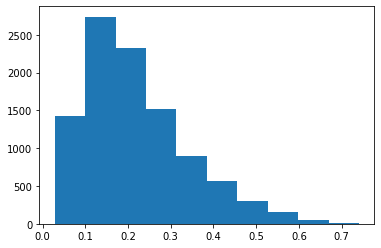

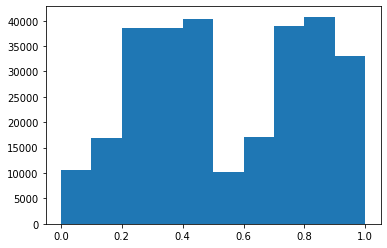

In [18]:
# Check the distribution of a random column

col = np.random.randint(30)

plt.hist(synthetic[:, col])
plt.show()

plt.hist(creditcard_scaled[:, col])
plt.show()

In [19]:
pate_gan.generator.save("PATE-GAN model")

INFO:tensorflow:Assets written to: PATE-GAN model\assets


INFO:tensorflow:Assets written to: PATE-GAN model\assets
